Name of Dataset: CMAPSS Jet Engine Simulated Data  
Description: Each time series is from a different engine i.e., the data can be considered to be from a fleet of engines of the same type. The engine is operating normally at the start of each time series, and develops a fault at some point during the series. In the training set, the fault grows in magnitude until system failure. In the test set, the time series ends some time prior to system failure. The objective of the competition is to predict the number of remaining operational cycles before failure in the test set, i.e., the number of operational cycles after the last cycle that the engine will continue to operate. Also provided a vector of true Remaining Useful Life (RUL) values for the test data.

The columns correspond to: 1) unit number 2) time, in cycles 3) operational setting 1 4) operational setting 2 5) operational setting 3 6) sensor measurement 1 7) sensor measurement 2 ... 26) sensor measurement 26

Data Set: FD001; Train trajectories: 100; Test trajectories: 100; Conditions: ONE (Sea Level); Fault Modes: ONE (HPC Degradation)  
Data Set: FD002; Train trajectories: 260; Test trajectories: 259; Conditions: SIX; Fault Modes: ONE (HPC Degradation)  
Data Set: FD003; Train trajectories: 100; Test trajectories: 100; Conditions: ONE (Sea Level); Fault Modes: TWO (HPC Degradation, Fan Degradation)  
Data Set: FD004; Train trajectories: 248; Test trajectories: 249; Conditions: SIX; Fault Modes: TWO (HPC Degradation, Fan Degradation)  

Use Cases: Regression (RUL Prediction)

A. Loading the Dataset and Extracting a single data point

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. For train data
column_names = [
    'unit_number', 'time_in_cycles',
    'op_setting_1', 'op_setting_2', 'op_setting_3'
] + [f'sensor_measurement_{i}' for i in range(1, 22)]

df_train = pd.read_csv('train_FD001.txt', sep=r'\s+', header=None, names=column_names)
print("\n1. For Train Data\n\nShape of the data:", df_train.shape)
sample_row = df_train.sample(n=1)

sample_row_T = sample_row.T
sample_row_T.columns = ['Value']
print("\nSingle Datapoint Sample (Transposed):\n")
print(sample_row_T.to_string())

# 2. For test data
df_test = pd.read_csv('test_FD001.txt', sep=r'\s+', header=None, names=column_names)
print("\n2. For Test Data\n\nShape of the data:", df_test.shape)
sample_row = df_test.sample(n=1)

sample_row_T = sample_row.T
sample_row_T.columns = ['Value']
print("\nSingle Datapoint Sample (Transposed):\n")
print(sample_row_T.to_string())

# 3. For RUL values of test data
rul_values = pd.read_csv('RUL_FD001.txt', header=None)
print("\n3. For RUL values of test data\n\nThis file gives the Remaining Useful Lifecycles (RUL) for each trajectory")
print("Single Datapoint Sample (Transposed)\n")
print(rul_values.iloc[0])


1. For Train Data

Shape of the data: (20631, 26)

Single Datapoint Sample (Transposed):

                           Value
unit_number              42.0000
time_in_cycles           29.0000
op_setting_1             -0.0013
op_setting_2              0.0003
op_setting_3            100.0000
sensor_measurement_1    518.6700
sensor_measurement_2    642.2900
sensor_measurement_3   1591.8100
sensor_measurement_4   1399.8700
sensor_measurement_5     14.6200
sensor_measurement_6     21.6100
sensor_measurement_7    554.2600
sensor_measurement_8   2388.0400
sensor_measurement_9   9061.5300
sensor_measurement_10     1.3000
sensor_measurement_11    47.1700
sensor_measurement_12   522.0200
sensor_measurement_13  2388.0300
sensor_measurement_14  8139.6200
sensor_measurement_15     8.3869
sensor_measurement_16     0.0300
sensor_measurement_17   392.0000
sensor_measurement_18  2388.0000
sensor_measurement_19   100.0000
sensor_measurement_20    38.8000
sensor_measurement_21    23.4727

2. For Test Data


B. Plotting the Data - Train and Test Data for a "single unit" in FD001 file (Unit number = 1st variable in train and test data) and RUL for "entire" file FD001 

    Note: One datapoint in RUL plot for FD001 corresponds to RUL for entire test data of a single unit in FD001

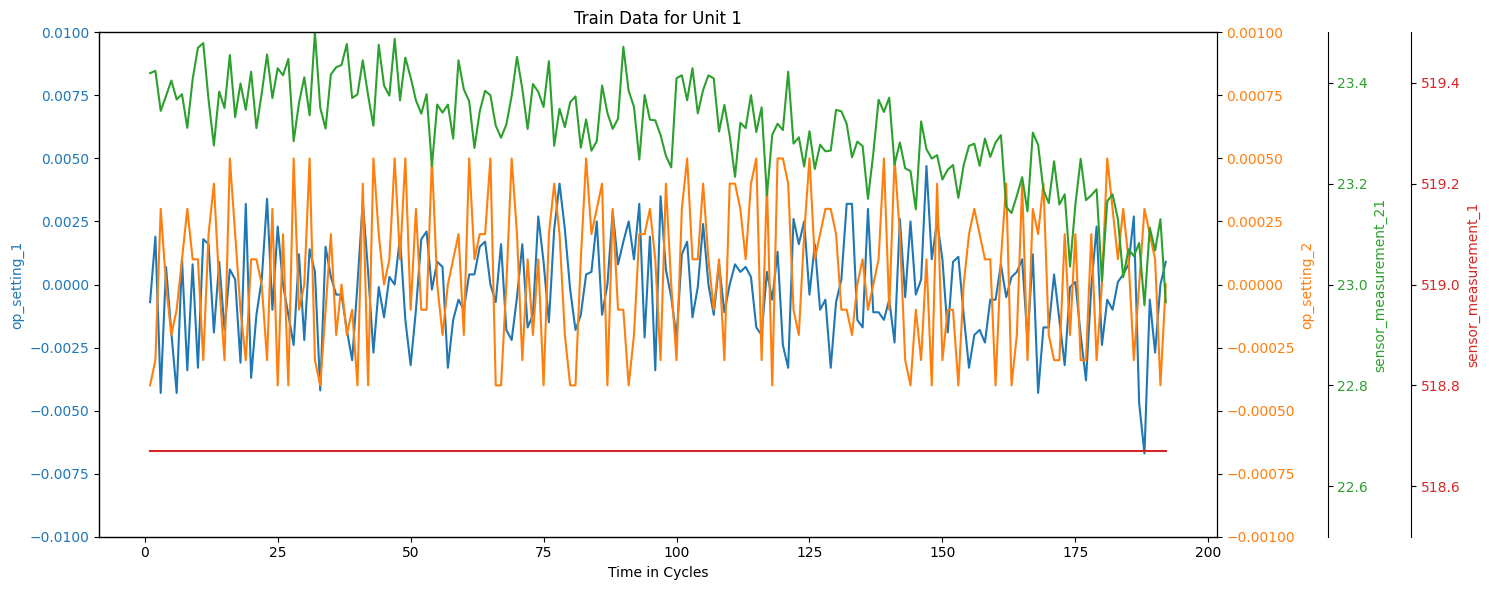

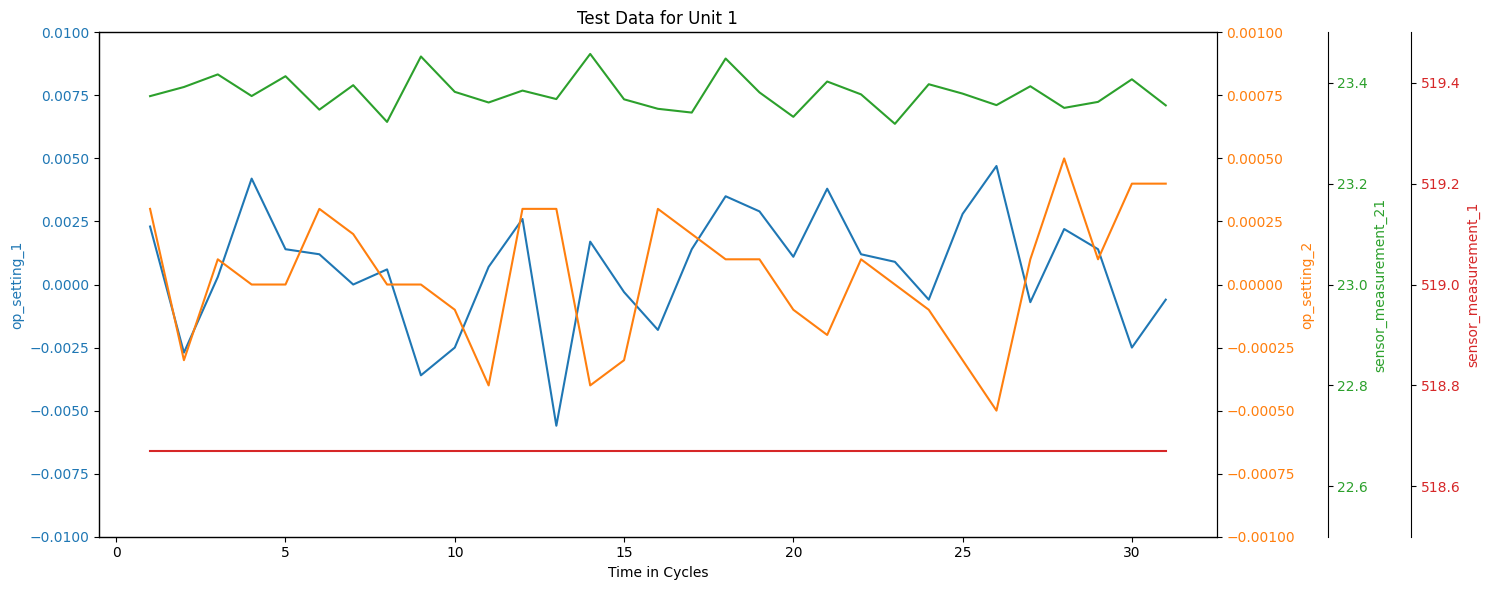

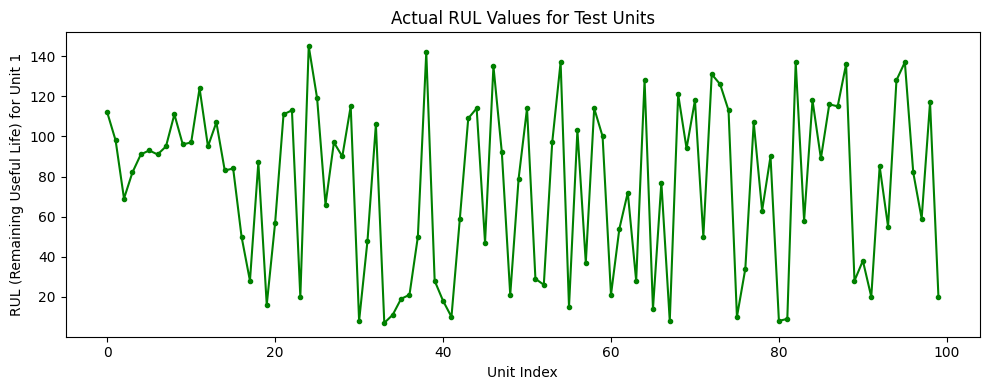

In [ ]:
def plot_with_multiple_y_axes(unit_df, title):
    fig, ax1 = plt.subplots(figsize=(15, 6))

    color1 = 'tab:blue'
    ax1.set_xlabel('Time in Cycles')
    ax1.set_ylabel('op_setting_1', color=color1)
    ax1.plot(unit_df['time_in_cycles'], unit_df['op_setting_1'], color=color1, label='op_setting_1')
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.set_ylim(-0.01, 0.01)

    ax2 = ax1.twinx()
    color2 = 'tab:orange'
    ax2.plot(unit_df['time_in_cycles'], unit_df['op_setting_2'], color=color2, label='op_setting_2')
    ax2.set_ylabel('op_setting_2', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)
    ax2.set_ylim(-0.001, 0.001)

    ax3 = ax1.twinx()
    color3 = 'tab:green'
    ax3.spines['right'].set_position(('outward', 80))
    ax3.plot(unit_df['time_in_cycles'], unit_df['sensor_measurement_21'], color=color3, label='sensor_measurement_21')
    ax3.set_ylabel('sensor_measurement_21', color=color3)
    ax3.tick_params(axis='y', labelcolor=color3)
    ax3.set_ylim(22.5, 23.5)

    ax4 = ax1.twinx()
    color4 = 'tab:red'
    ax4.spines['right'].set_position(('outward', 140))
    ax4.plot(unit_df['time_in_cycles'], unit_df['sensor_measurement_1'], color=color4, label='sensor_measurement_1')
    ax4.set_ylabel('sensor_measurement_1', color=color4)
    ax4.tick_params(axis='y', labelcolor=color4)
    ax4.set_ylim(518.5, 519.5)

    plt.title(title)
    ax1.grid(False)
    fig.tight_layout()
    plt.show()

#1. Plot for Train Data
unit_id = 1
unit_df = df_train[df_train['unit_number'] == unit_id]
plot_with_multiple_y_axes(unit_df_train, f'Train Data for Unit {unit_id}')

#2. Plot for Test Data
unit_id = 1
unit_df = df_test[df_test['unit_number'] == unit_id]
plot_with_multiple_y_axes(unit_df_test, f'Test Data for Unit {unit_id}')


#3. Plot for RUL
plt.figure(figsize=(10, 4))
plt.plot(rul_values.values.flatten(), marker='.', linestyle='-', color='green')
plt.title('Actual RUL Values for Test Units')
plt.xlabel('Unit Index')
plt.ylabel(f'RUL (Remaining Useful Life) for Unit {unit_id}')
plt.grid(False)
plt.tight_layout()
plt.show()


C. Using a Model from Scikit learn - Random Forest Regressor

Test MAE: 24.39
Test R² Score: 0.36


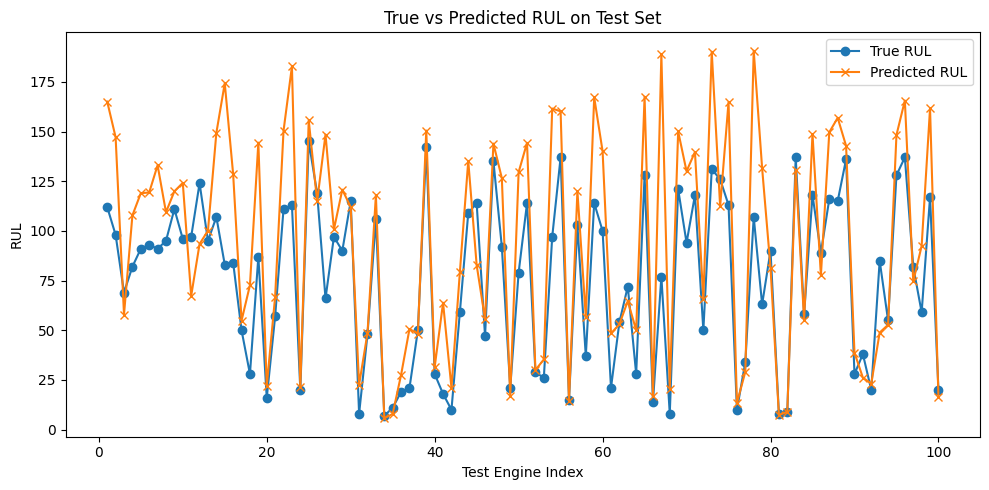

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

df_train['RUL'] = df_train.groupby('unit_number')['time_in_cycles'].transform('max') - df_train['time_in_cycles']

feature_cols = ['op_setting_1', 'op_setting_2', 'op_setting_3'] + [f'sensor_measurement_{i}' for i in range(1, 22)]

X = df_train[feature_cols]
y = df_train['RUL']

#Train/Validation Split
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
#rf_model.fit(X_train, y_train)
rf_model.fit(X, y)

#Validation Performance
#y_val_pred = rf_model.predict(X_val)
#val_mae = mean_absolute_error(y_val, y_val_pred)
#val_r2 = r2_score(y_val, y_val_pred)

#print(f"Validation MAE: {val_mae:.2f}")
#print(f"Validation R² Score: {val_r2:.2f}")

test_last_cycles = df_test.groupby('unit_number').last().reset_index()
X_test = test_last_cycles[feature_cols]
y_test_true = rul_values[0].values

y_test_pred = rf_model.predict(X_test)

test_mae = mean_absolute_error(y_test_true, y_test_pred)
test_r2 = r2_score(y_test_true, y_test_pred)

print(f"Test MAE: {test_mae:.2f}")
print(f"Test R² Score: {test_r2:.2f}")

plt.figure(figsize=(10, 5))
plt.plot([i for i in range (1, 101)], y_test_true, label='True RUL', marker='o')
plt.plot([i for i in range (1, 101)], y_test_pred, label='Predicted RUL', marker='x')
plt.xlabel('Test Engine Index')
plt.ylabel('RUL')
plt.title('True vs Predicted RUL on Test Set')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()
